In [12]:
LOUD_SAX = "/home/yuan/Desktop/SaxGPT/data/main/stems/sax_C6LhuZFP9L8.wav"
SOFT_SAX = "/home/yuan/Desktop/SaxGPT/data/main/stems/sax_3Pmif4QeEg0.wav"
TEST = "/home/yuan/Desktop/SaxGPT/data/main/stems/sax_BhHxO1ElbQw.wav"

/home/yuan/Desktop/SaxGPT/.venv/encodec/lib/python3.13/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/home/yuan/Desktop/SaxGPT/.venv/encodec/lib/python3.13/site-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


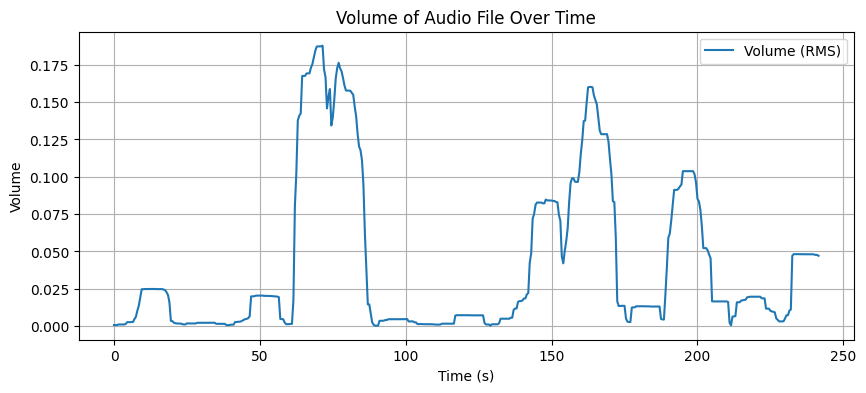

In [14]:
import matplotlib.pyplot as plt
import torchaudio
import torch
import torch.nn.functional as F
from typing import Optional, Tuple
from datetime import timedelta
from src.data.audio_util import extract_windows_above_threshold, normalize_lufs

def plot_volume(
    audio_file_path: str, interval: Optional[Tuple[timedelta, timedelta]] = None
):
    waveform, sample_rate = torchaudio.load(audio_file_path)
    assert (waveform.dim() == 2) and (waveform.shape[0] == 1), "audio must be mono"

    frame_length = 32000 * 10
    hop_length = int(32000 * 0.5)
    padding = frame_length - hop_length
    waveform = normalize_lufs(waveform, sample_rate)
    waveform = F.pad(waveform, (padding // 2, padding - padding // 2))
    rms_over_time = torch.sqrt(
        F.avg_pool1d(waveform**2, kernel_size=frame_length, stride=hop_length)
    )
    
    time_axis = torch.arange(rms_over_time.shape[1]) * hop_length / sample_rate

    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, rms_over_time[0], label="Volume (RMS)")
    if interval is not None:
        start, end = interval[0].seconds, interval[1].seconds
        plt.xlim(start, end)
    plt.xlabel("Time (s)")
    plt.ylabel("Volume")
    plt.title("Volume of Audio File Over Time")
    plt.legend()
    plt.grid()
    plt.show()

plot_volume(SOFT_SAX)


In [17]:
from pathlib import Path

extract_windows_above_threshold(Path(LOUD_SAX), rms_threshold=0.05, min_window_size_seconds = 30)

/home/yuan/Desktop/SaxGPT/.venv/encodec/lib/python3.13/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/home/yuan/Desktop/SaxGPT/.venv/encodec/lib/python3.13/site-packages/pyloudnorm/normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


[(0.0, 138.6), (247.8, 313.0)]